# Annotation EDA

In [2]:
import pandas as pd
from collections import Counter
import numpy as np
from skimage.io import imread
import matplotlib.pyplot as plt
import os
from sklearn.metrics import cohen_kappa_score

### Loading data

In [3]:
# loading the annotations and meta-data 
a1 = pd.read_excel("../Data/Annotations/Annotations_a1.xlsx", index_col=0)[:1011]
a2 = pd.read_excel("../Data/Annotations/Annotations_a2.xlsx", index_col=0)[:1011]
chest_data = pd.read_csv('../Data/preprocessed_df_08032023.csv')
print(a1.NSG_tube.unique())
print(a2.NSG_tube.unique())

[0.75 0.   1.   0.25]
[0.25 1.   0.   0.75 0.5 ]


/tmp/ipykernel_27144/1929724561.py:4: DtypeWarning: Columns (19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  chest_data = pd.read_csv('../Data/preprocessed_df_08032023.csv')


In [4]:
print(a2.Notes.unique())

[nan 'upside down ' 'slightly rotated ' 'Lots of white ' 'Invalid?'
 'Rotated 90 degrees clockwise ' 'No lungs?' 'Too much included?'
 'Upside down ' '90 degrees counter clockwise and with white padding '
 'Entire body of a baby ' '90 degrees clockwise and with white padding '
 'Slightly rotated ']


In [5]:
print(a1.Notes.unique())

[nan 'upside down' 'too unclear' 'projection?' 'rotated' 'below chest'
 'only partial chest' 'rotated.. And weird']


In [6]:
# Combining the annotations
Annotations = a1.merge(a2, how='inner', on='ImageID')
Annotations = Annotations.rename(columns={"Chest_drain_tube_x": "Chest_drain_tube_a1", "NSG_tube_x": "NSG_tube_a1", "Endotracheal_tube_x": "Endotracheal_tube_a1", "Tracheostomy_tube_x": "Tracheostomy_tube_a1", "Notes_x": "Notes_a1",
                                         "Chest_drain_tube_y": "Chest_drain_tube_a2", "NSG_tube_y": "NSG_tube_a2", "Endotracheal_tube_y": "Endotracheal_tube_a2", "Tracheostomy_tube_y": "Tracheostomy_tube_a2", "Notes_y": "Notes_a2"})

Annotations = Annotations.merge(chest_data, how='inner', on='ImageID')
print(len(Annotations))

1011


###  Annotation counts

In [7]:
# return a df of raw annotation counts 
def annotation_counts_raw(df, column_name1, column_name2, tube_name):
    # Counting the labels giving by each annotator
    a1 = df.groupby([column_name1]).size().reset_index()
    a1 = a1.rename(columns={0: column_name1, column_name1: tube_name})

    a2 = df.groupby([column_name2]).size().reset_index()
    a2 = a2.rename(columns={0: column_name2, column_name2: tube_name})

    counts = a1.merge(a2, how='left', on=[tube_name])
    return counts

# return a df of annotation counts per image 
def annotation_counts_imagewise(df, column_name1, column_name2):
    # counting number of annotation combinations:
    temp = df[[column_name1, column_name2]]

    df2 = pd.DataFrame(temp).value_counts().reset_index(name='counts')
    df2["percent"] = (df2['counts'] / df2['counts'].sum()) * 100
    return df2


### Chest Drain

In [8]:
annotation_counts_raw(Annotations, "Chest_drain_tube_a1","Chest_drain_tube_a2", "Drain")

,Drain,Chest_drain_tube_a1,Chest_drain_tube_a2
0,0.00,926,955
1,0.25,29,9
2,0.75,19,7
3,1.00,37,37


In [9]:
annotation_counts_imagewise(Annotations, "Chest_drain_tube_a1","Chest_drain_tube_a2")

,Chest_drain_tube_a1,Chest_drain_tube_a2,counts,percent
0,0.00,0.00,916,90.603363
1,1.00,1.00,28,2.769535
2,0.25,0.00,23,2.274975
3,0.75,0.00,10,0.989120
4,1.00,0.00,6,0.593472
5,0.00,0.25,5,0.494560
6,0.75,1.00,5,0.494560
7,0.25,1.00,3,0.296736
8,0.00,0.50,2,0.197824
9,0.00,0.75,2,0.197824


### NSG tube

In [10]:
annotation_counts_raw(Annotations, "NSG_tube_a1", "NSG_tube_a2", "NSG tube")

,NSG tube,NSG_tube_a1,NSG_tube_a2
0,0.00,353,404
1,0.25,85,79
2,0.75,339,277
3,1.00,234,250


In [11]:
annotation_counts_imagewise(Annotations, "NSG_tube_a1", "NSG_tube_a2")

,NSG_tube_a1,NSG_tube_a2,counts,percent
0,0.00,0.00,283,27.992087
1,1.00,1.00,149,14.737883
2,0.75,0.75,148,14.638971
3,0.75,1.00,90,8.902077
4,0.75,0.00,70,6.923838
5,1.00,0.75,62,6.132542
6,0.25,0.75,35,3.461919
7,0.25,0.00,33,3.264095
8,0.00,0.75,32,3.165183
9,0.00,0.25,31,3.066271


### Endotracheal tube

In [12]:
annotation_counts_raw(Annotations, "Endotracheal_tube_a1", "Endotracheal_tube_a2", "Endotracheal tube")

,Endotracheal tube,Endotracheal_tube_a1,Endotracheal_tube_a2
0,0.00,792,628
1,0.25,41,79
2,0.75,87,131
3,1.00,91,173


In [13]:
annotation_counts_imagewise(Annotations, "Endotracheal_tube_a1", "Endotracheal_tube_a2")

,Endotracheal_tube_a1,Endotracheal_tube_a2,counts,percent
0,0.00,0.00,604,59.742829
1,1.00,1.00,77,7.616222
2,0.00,0.75,75,7.418398
3,0.00,0.25,67,6.627102
4,0.00,1.00,46,4.549951
5,0.75,1.00,40,3.956479
6,0.75,0.75,36,3.560831
7,0.25,0.00,14,1.384768
8,0.25,0.75,11,1.088032
9,0.25,1.00,10,0.989120


### Tracheostomy tube 

In [14]:
annotation_counts_raw(Annotations, "Tracheostomy_tube_a1", "Tracheostomy_tube_a2", "Tracheostomy tube")

,Tracheostomy tube,Tracheostomy_tube_a1,Tracheostomy_tube_a2
0,0.00,741,753
1,0.25,8,1
2,0.75,20,3
3,1.00,242,254


In [15]:
annotation_counts_imagewise(Annotations, "Tracheostomy_tube_a1", "Tracheostomy_tube_a2")

,Tracheostomy_tube_a1,Tracheostomy_tube_a2,counts,percent
0,0.00,0.00,739,73.095945
1,1.00,1.00,236,23.343225
2,0.75,1.00,13,1.285856
3,0.25,0.00,5,0.494560
4,0.75,0.00,5,0.494560
5,1.00,0.00,4,0.395648
6,0.25,1.00,3,0.296736
7,0.00,1.00,2,0.197824
8,1.00,0.75,2,0.197824
9,0.75,0.25,1,0.098912


# Check agreement with padchest

In [16]:
# adding the padchest label to the annotations
Annotations["Chest_drain_tube_padchest"] = [1 if "chest drain tube" in i else 0 for i in Annotations.Labels]
Annotations["NSG_tube_padchest"] = [1 if "nsg tube" in i else 0 for i in Annotations.Labels]
Annotations["Endotracheal_tube_padchest"] = [1 if "endotracheal tube" in i else 0 for i in Annotations.Labels]
Annotations["Tracheostomy_tube_padchest"] = [1 if "tracheostomy tube" in i else 0 for i in Annotations.Labels ]

In [17]:
def add_tube_aggreation(df, column_name):
    aggre = []

    a1 = df[column_name+"_a1"]
    a2 = df[column_name+"_a2"]
    
    for i in range(len(df)):
        if a1[i] > 0.5 and a2[i] > 0.5:
            aggre.append(1)
        elif a1[i] < 0.5 and a2[i] < 0.5:
            aggre.append(0)
        else:
            aggre.append(-1)

    return aggre        

In [18]:
# adding the aggreated annotations
Annotations["Chest_drain_tube_aggregation"] = add_tube_aggreation(Annotations, "Chest_drain_tube") 
Annotations["NSG_tube_aggregation"] = add_tube_aggreation(Annotations, "NSG_tube")
Annotations["Endotracheal_tube_aggregation"] = add_tube_aggreation(Annotations, "Endotracheal_tube")
Annotations["Tracheostomy_tube_aggregation"] = add_tube_aggreation(Annotations, "Tracheostomy_tube")

### Chest drain  

In [19]:
annotation_counts_raw(Annotations, "Chest_drain_tube_padchest", "Chest_drain_tube_aggregation", "Chest drain")

,Chest drain,Chest_drain_tube_padchest,Chest_drain_tube_aggregation
0,0,940,946
1,1,71,37


In [20]:
annotation_counts_imagewise(Annotations, "Chest_drain_tube_padchest", "Chest_drain_tube_aggregation")

,Chest_drain_tube_padchest,Chest_drain_tube_aggregation,counts,percent
0,0,0,923,91.295747
1,1,1,35,3.461919
2,1,0,23,2.274975
3,0,-1,15,1.483680
4,1,-1,13,1.285856
5,0,1,2,0.197824


### NSG 

In [21]:
annotation_counts_raw(Annotations, "NSG_tube_padchest", "NSG_tube_aggregation", "nsg")

,nsg,NSG_tube_padchest,NSG_tube_aggregation
0,0,266,360
1,1,745,449


In [22]:
annotation_counts_imagewise(Annotations, "NSG_tube_padchest", "NSG_tube_aggregation")


,NSG_tube_padchest,NSG_tube_aggregation,counts,percent
0,1,1,422,41.740851
1,0,0,210,20.771513
2,1,-1,173,17.111771
3,1,0,150,14.836795
4,0,-1,29,2.868447
5,0,1,27,2.670623


### Endotracheal

In [23]:
annotation_counts_raw(Annotations, "Endotracheal_tube_padchest", "Endotracheal_tube_aggregation", "Endotracheal")

,Endotracheal,Endotracheal_tube_padchest,Endotracheal_tube_aggregation
0,0,653,691
1,1,358,162


In [24]:
annotation_counts_imagewise(Annotations, "Endotracheal_tube_padchest", "Endotracheal_tube_aggregation")


,Endotracheal_tube_padchest,Endotracheal_tube_aggregation,counts,percent
0,0,0,589,58.259149
1,1,1,152,15.034619
2,1,-1,104,10.286845
3,1,0,102,10.089021
4,0,-1,54,5.341246
5,0,1,10,0.989120


### Tracheostomy

In [25]:
annotation_counts_raw(Annotations, "Tracheostomy_tube_padchest", "Tracheostomy_tube_aggregation", "Tracheostomy")


,Tracheostomy,Tracheostomy_tube_padchest,Tracheostomy_tube_aggregation
0,0,776,744
1,1,235,252


In [26]:


annotation_counts_imagewise(Annotations, "Tracheostomy_tube_padchest", "Tracheostomy_tube_aggregation")


,Tracheostomy_tube_padchest,Tracheostomy_tube_aggregation,counts,percent
0,0,0,741,73.293769
1,1,1,224,22.156281
2,0,1,28,2.769535
3,1,-1,8,0.791296
4,0,-1,7,0.692384
5,1,0,3,0.296736


# Print images, where we disagree with padchest 

In [49]:
def display_image(img_path, figsize=(7,7)):
    img = imread(img_path)
    plt.figure(figsize = figsize)
    plt.imshow(img, cmap='gray')
    plt.show()

def display_images_for_annotations(annotation_df, tube_column1, tube_column2, figsize=(4,4)):  
    for i in range(len(annotation_df)):
        img_path = '../../../purrlab_students/padchest-preprocessed/' + str(annotation_df['ImageDir'][i]) + '/' + str(annotation_df['ImageID'][i])
        print(img_path)
        print('Line idx: ', i)
        print('ImageDir: ', str(annotation_df['ImageDir'][i]))
        print('ImageID: ', str(annotation_df['ImageID'][i]))
        print("tube in padchest", annotation_df[tube_column1][i])
        print("tube annotated by us", annotation_df[tube_column2][i])
        display_image(img_path, figsize=figsize)
        print(2*'\n')

# Tracheostomy   

../../../purrlab_students/padchest-preprocessed/15/216840111366964013829543166512013345083648405_02-096-057.png
Line idx:  0
ImageDir:  15
ImageID:  216840111366964013829543166512013345083648405_02-096-057.png
tube in padchest 0
tube annotated by us 1


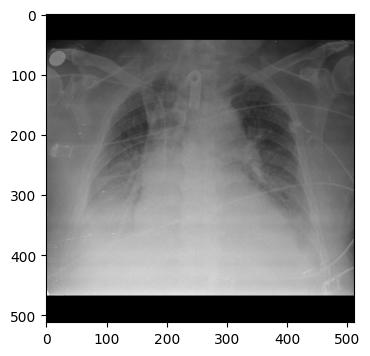

In [50]:
tra1 = Annotations[((Annotations.Tracheostomy_tube_padchest == 0) & (Annotations.Tracheostomy_tube_aggregation == 1))].reset_index(drop=True)
display_images_for_annotations(tra1[:1], "Tracheostomy_tube_padchest", "Tracheostomy_tube_aggregation",)

../../../purrlab_students/padchest-preprocessed/29/216840111366964013451228379692012297090158155_01-122-085.png
Line idx:  0
ImageDir:  29
ImageID:  216840111366964013451228379692012297090158155_01-122-085.png
tube in padchest 1
tube annotated by us 0


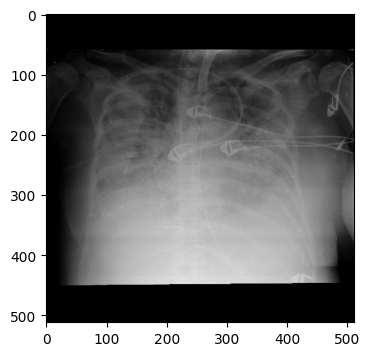

In [51]:
tra2 = Annotations[((Annotations.Tracheostomy_tube_padchest == 1) & (Annotations.Tracheostomy_tube_aggregation == 0))].reset_index(drop=True)
display_images_for_annotations(tra2[:1], "Tracheostomy_tube_padchest", "Tracheostomy_tube_aggregation",)

## Chest drain  

../../../purrlab_students/padchest-preprocessed/38/216840111366964012558082906712009348111931673_00-091-063.png
Line idx:  0
ImageDir:  38
ImageID:  216840111366964012558082906712009348111931673_00-091-063.png
tube in padchest 0
tube annotated by us 1


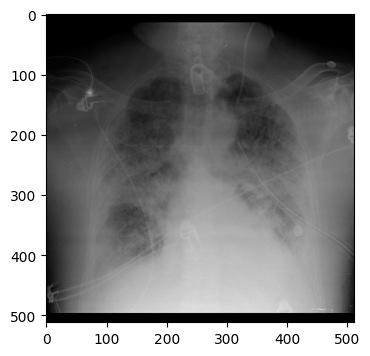

In [52]:
chest1 = Annotations[((Annotations.Chest_drain_tube_padchest == 0) & (Annotations.Chest_drain_tube_aggregation == 1))].reset_index(drop=True)
display_images_for_annotations(chest1[:1], "Chest_drain_tube_padchest", "Chest_drain_tube_aggregation",)

../../../purrlab_students/padchest-preprocessed/26/216840111366964013200840352202011312142918996_01-024-018.png
Line idx:  0
ImageDir:  26
ImageID:  216840111366964013200840352202011312142918996_01-024-018.png
tube in padchest 1
tube annotated by us 0


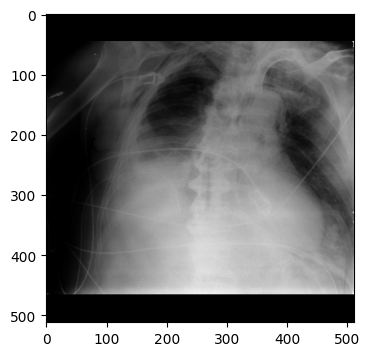

In [53]:
chest2 = Annotations[((Annotations.Chest_drain_tube_padchest == 1) & (Annotations.Chest_drain_tube_aggregation == 0))].reset_index(drop=True)
display_images_for_annotations(chest2[:1], "Chest_drain_tube_padchest", "Chest_drain_tube_aggregation",)

In [54]:
wrong = pd.concat([tra1, tra2])
wrong = pd.concat([chest1, chest2])

In [55]:
Counter(wrong.MethodLabel)

Counter({'RNN_model': 23, 'Physician': 2})

../../../purrlab_students/padchest-preprocessed/2/315655320523004974932472015347869355953_9b6g4k.png
Line idx:  0
ImageDir:  2
ImageID:  315655320523004974932472015347869355953_9b6g4k.png
tube in padchest 0
tube annotated by us 1


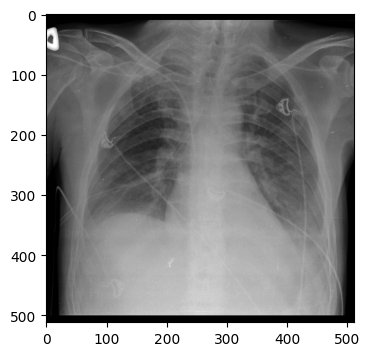




../../../purrlab_students/padchest-preprocessed/54/292472440402309477335347302569367025622_-dkg0x.png
Line idx:  1
ImageDir:  54
ImageID:  292472440402309477335347302569367025622_-dkg0x.png
tube in padchest 1
tube annotated by us 0


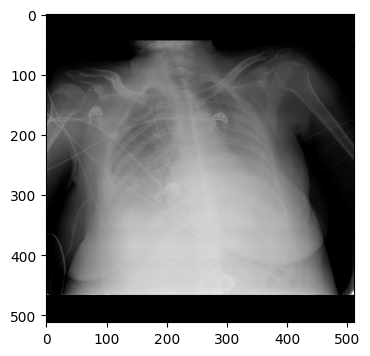

In [56]:
phy = wrong[(wrong.MethodLabel == "Physician")].reset_index(drop=True)
display_images_for_annotations(phy, "Chest_drain_tube_padchest", "Chest_drain_tube_aggregation",)

# Computing cohens kappa 

In [4]:
Annotations.columns

Index(['ImageDir_x', 'ImageID', 'Chest_drain_tube_a1', 'NSG_tube_a1',
       'Endotracheal_tube_a1', 'Tracheostomy_tube_a1', 'Notes_a1',
       'ImageDir_y', 'Chest_drain_tube_a2', 'NSG_tube_a2',
       'Endotracheal_tube_a2', 'Tracheostomy_tube_a2', 'Notes_a2',
       'Unnamed: 0', 'ImageDir', 'StudyDate_DICOM', 'StudyID', 'PatientID',
       'PatientBirth', 'PatientSex_DICOM', 'ViewPosition_DICOM', 'Projection',
       'MethodProjection', 'Pediatric', 'Modality_DICOM', 'Manufacturer_DICOM',
       'PhotometricInterpretation_DICOM', 'PixelRepresentation_DICOM',
       'PixelAspectRatio_DICOM', 'SpatialResolution_DICOM', 'BitsStored_DICOM',
       'WindowCenter_DICOM', 'WindowWidth_DICOM', 'Rows_DICOM',
       'Columns_DICOM', 'XRayTubeCurrent_DICOM', 'Exposure_DICOM',
       'ExposureInuAs_DICOM', 'ExposureTime', 'RelativeXRayExposure_DICOM',
       'ReportID', 'Report', 'MethodLabel', 'Labels', 'Localizations',
       'LabelsLocalizationsBySentence', 'labelCUIS', 'LocalizationsCUIS']

In [57]:
def compute_cohens_kappa(df, col1, col2):
    df = df.copy()
    df = df[(df[col1] != -1) | (df[col2] != -1)]
    
    print(cohen_kappa_score(df[col1], df[col2]))
    print()

In [58]:
print("Chest drain")
compute_cohens_kappa(Annotations, "Chest_drain_tube_padchest", "Chest_drain_tube_aggregation")
print("NSG")
compute_cohens_kappa(Annotations, "NSG_tube_padchest", "NSG_tube_aggregation")
print("Endo")
compute_cohens_kappa(Annotations, "Endotracheal_tube_padchest", "Endotracheal_tube_aggregation")
print("Trach")
compute_cohens_kappa(Annotations, "Tracheostomy_tube_padchest", "Tracheostomy_tube_aggregation")

Chest drain
0.588626836795799

NSG
0.35259759130599333

Endo
0.4677930676815454

Trach
0.8793797026120651



### Cohens kappa for the two annotators

In [60]:
def add_tube_aggreation(df, column_name):
    aggre = []
    a = df[column_name]
    for i in range(len(df)):
        if a[i] > 0.5:
            aggre.append(1)
        elif a[i] < 0.5:
            aggre.append(0)
        else:
            aggre.append(-1)
    return aggre 

# adding the aggreated annotations
Annotations["Chest_drain_tube_agg_a1"] = add_tube_aggreation(Annotations, "Chest_drain_tube_a1") 
Annotations["NSG_tube_agg_a1"] = add_tube_aggreation(Annotations, "NSG_tube_a1")
Annotations["Endotracheal_tube_agg_a1"] = add_tube_aggreation(Annotations, "Endotracheal_tube_a1")
Annotations["Tracheostomy_tube_agg_a1"] = add_tube_aggreation(Annotations, "Tracheostomy_tube_a1")

# adding the aggreated annotations
Annotations["Chest_drain_tube_agg_a2"] = add_tube_aggreation(Annotations, "Chest_drain_tube_a2") 
Annotations["NSG_tube_agg_a2"] = add_tube_aggreation(Annotations, "NSG_tube_a2")
Annotations["Endotracheal_tube_agg_a2"] = add_tube_aggreation(Annotations, "Endotracheal_tube_a2")
Annotations["Tracheostomy_tube_agg_a2"] = add_tube_aggreation(Annotations, "Tracheostomy_tube_a2")

In [61]:
print("Chest drain")
compute_cohens_kappa(Annotations, "Chest_drain_tube_agg_a1", "Chest_drain_tube_agg_a2")
print("NSG")
compute_cohens_kappa(Annotations, "NSG_tube_agg_a1", "NSG_tube_agg_a2")
print("Endo")
compute_cohens_kappa(Annotations, "Endotracheal_tube_agg_a1", "Endotracheal_tube_agg_a2")
print("Trach")
compute_cohens_kappa(Annotations, "Tracheostomy_tube_agg_a1", "Tracheostomy_tube_agg_a2")

Chest drain
0.7141674323737593

NSG
0.5984592879220443

Endo
0.5786144276375839

Trach
0.9611194720555019



## Making agreement plots 

### Agreement between annotators 

In [62]:
# adding the aggreated annotations
Annotations["Chest_drain_tube_aggregation"] = add_tube_aggreation(Annotations, "Chest_drain_tube") 
Annotations["NSG_tube_aggregation"] = add_tube_aggreation(Annotations, "NSG_tube")
Annotations["Endotracheal_tube_aggregation"] = add_tube_aggreation(Annotations, "Endotracheal_tube")
Annotations["Tracheostomy_tube_aggregation"] = add_tube_aggreation(Annotations, "Tracheostomy_tube")

KeyError: 'Chest_drain_tube'

In [ ]:
dict(Counter(Annotations["Chest_drain_tube_aggregation"]))

In [ ]:
chest = {k:v/sum(Counter(Annotations["Chest_drain_tube_aggregation"]).values())*100 for (k,v) in Counter(Annotations["Chest_drain_tube_aggregation"]).items()}
nsg = {k:v/sum(Counter(Annotations["NSG_tube_aggregation"]).values())*100 for (k,v) in Counter(Annotations["NSG_tube_aggregation"]).items()}
endo = {k:v/sum(Counter(Annotations["Endotracheal_tube_aggregation"]).values())*100 for (k,v) in Counter(Annotations["Endotracheal_tube_aggregation"]).items()}
tra = {k:v/sum(Counter(Annotations["Tracheostomy_tube_aggregation"]).values())*100 for (k,v) in Counter(Annotations["Tracheostomy_tube_aggregation"]).items()}

# nsg = Counter(Annotations["NSG_tube_aggregation"])
# endo = Counter(Annotations["Endotracheal_tube_aggregation"])
# tra = Counter(Annotations["Tracheostomy_tube_aggregation"])

g1 = np.array([chest[0]+chest[1], nsg[0]+nsg[1], endo[0]+endo[1], tra[0]+tra[1]])
g2 = np.array([chest[-1], nsg[-1], endo[-1], tra[-1]])
x = ["Chest Drain", "NSG", "Endotracheal", "Tracheostomy"]

fig, ax = plt.subplots(figsize=(9,4))
p1 = ax.barh(x, g1, color='aquamarine', label="Agree")
p2 = ax.barh(x, g2, left=(g1), color='cornflowerblue', label="Disagree")

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.12),
          ncol=7, fancybox=True)#, shadow=True)

ax.set_xlabel("Percentage (%)", fontsize=12)

ax.bar_label(p1, label_type='center', fmt='%.1f')
ax.bar_label(p2, label_type='center', fmt='%.1f')

# plt.savefig("Distribution_certain", bbox_inches="tight")
plt.show()

### Agreement with Padchest 

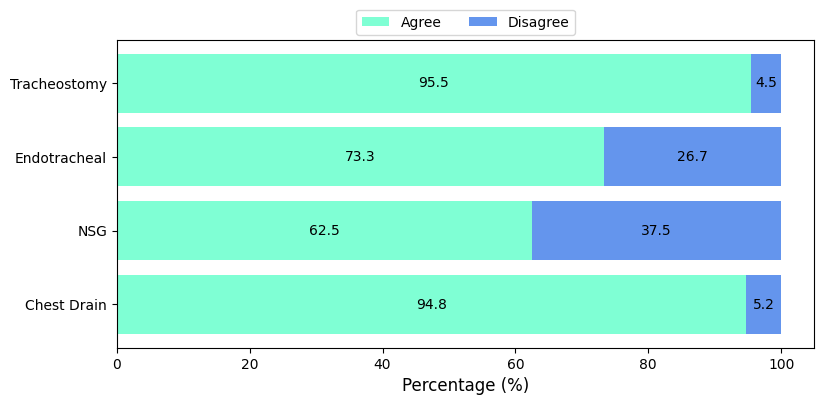

In [63]:
chest = annotation_counts_imagewise(Annotations, "Chest_drain_tube_padchest", "Chest_drain_tube_aggregation")
nsg = annotation_counts_imagewise(Annotations, "NSG_tube_padchest", "NSG_tube_aggregation")
endo = annotation_counts_imagewise(Annotations, "Endotracheal_tube_padchest", "Endotracheal_tube_aggregation")
tra = annotation_counts_imagewise(Annotations, "Tracheostomy_tube_padchest", "Tracheostomy_tube_aggregation")

g1 = np.array([sum(chest["percent"][:2]), 
               sum(nsg["percent"][:2]), 
               sum(endo["percent"][:2]), 
               sum(tra["percent"][:2])])
g2 = np.array([sum(chest["percent"][2:]), 
               sum(nsg["percent"][2:]), 
               sum(endo["percent"][2:]), 
               sum(tra["percent"][2:])])

x = ["Chest Drain", "NSG", "Endotracheal", "Tracheostomy"]

fig, ax = plt.subplots(figsize=(9,4))
p1 = ax.barh(x, g1, color='aquamarine', label="Agree")
p2 = ax.barh(x, g2, left=(g1), color='cornflowerblue', label="Disagree")

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.12),
          ncol=7, fancybox=True)#, shadow=True)

ax.set_xlabel("Percentage (%)", fontsize=12)

ax.bar_label(p1, label_type='center', fmt='%.1f')
ax.bar_label(p2, label_type='center', fmt='%.1f')

# plt.savefig("Distribution_certain", bbox_inches="tight")
plt.show()

## Raw annotation percentages 

{0.0: 91.59248269040555, 0.25: 2.868447082096934, 0.75: 1.8793273986152326, 1.0: 3.6597428288822944}
{0.75: 33.531157270029674, 0.0: 34.91592482690405, 1.0: 23.14540059347181, 0.25: 8.40751730959446}
{0.0: 78.33827893175074, 0.75: 8.605341246290802, 0.25: 4.055390702274975, 1.0: 9.000989119683481}
{1.0: 23.93669634025717, 0.0: 73.29376854599407, 0.25: 0.791295746785361, 0.75: 1.9782393669634024}


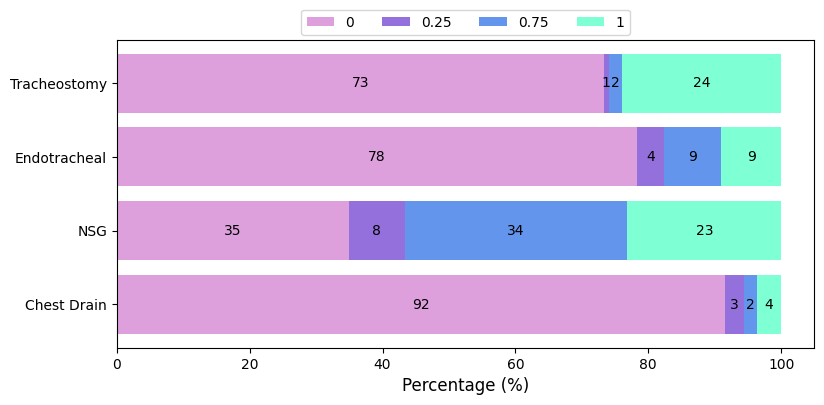

In [64]:
chest = {k:v/sum(Counter(Annotations["Chest_drain_tube_a1"]).values())*100 for (k,v) in Counter(Annotations["Chest_drain_tube_a1"]).items()}
nsg = {k:v/sum(Counter(Annotations["NSG_tube_a1"]).values())*100 for (k,v) in Counter(Annotations["NSG_tube_a1"]).items()}
endo = {k:v/sum(Counter(Annotations["Endotracheal_tube_a1"]).values())*100 for (k,v) in Counter(Annotations["Endotracheal_tube_a1"]).items()}
tra = {k:v/sum(Counter(Annotations["Tracheostomy_tube_a1"]).values())*100 for (k,v) in Counter(Annotations["Tracheostomy_tube_a1"]).items()}

print(chest)
print(nsg)
print(endo)
print(tra)

g1 = np.array([chest[0.0], nsg[0.0], endo[0.0], tra[0.0]])
g2 = np.array([chest[0.25], nsg[0.25], endo[0.25], tra[0.25]])
g3 = np.array([chest[0.75], nsg[0.75], endo[0.75], tra[0.75]])
g4 = np.array([chest[1.0], nsg[1.0], endo[1.0], tra[1.0]])

x = ["Chest Drain", "NSG", "Endotracheal", "Tracheostomy"]

fig, ax = plt.subplots(figsize=(9,4))
p1 = ax.barh(x, g1, color='plum', label="0")
p2 = ax.barh(x, g2, left=(g1), color='mediumpurple', label="0.25")
p3 = ax.barh(x, g3, left=(g1+g2), color='cornflowerblue', label="0.75")
p4 = ax.barh(x, g4, left=(g1+g2+g3), color='aquamarine', label="1")


ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.12),
          ncol=7, fancybox=True)#, shadow=True)

ax.set_xlabel("Percentage (%)", fontsize=12)

ax.bar_label(p1, label_type='center', fmt='%.0f')
ax.bar_label(p2, label_type='center', fmt='%.0f')
ax.bar_label(p3, label_type='center', fmt='%.0f')
ax.bar_label(p4, label_type='center', fmt='%.0f')


# plt.savefig("Distribution_certain", bbox_inches="tight")
plt.show()

{0.0: 94.46092977250248, 0.25: 0.8902077151335311, 0.5: 0.2967359050445104, 1.0: 3.6597428288822944, 0.75: 0.6923837784371909}
{0.25: 7.81404549950544, 1.0: 24.727992087042534, 0.0: 39.960435212660734, 0.75: 27.398615232443124, 0.5: 0.09891196834817012}
{0.0: 62.11671612265084, 0.75: 12.957467853610286, 0.25: 7.81404549950544, 1.0: 17.11177052423343}
{1.0: 25.123639960435213, 0.0: 74.4807121661721, 0.75: 0.2967359050445104, 0.25: 0.09891196834817012}



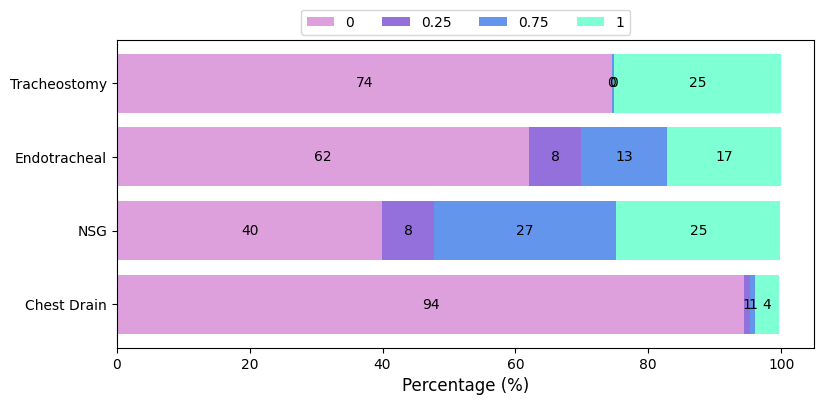

In [65]:
chest = {k:v/sum(Counter(Annotations["Chest_drain_tube_a2"]).values())*100 for (k,v) in Counter(Annotations["Chest_drain_tube_a2"]).items()}
nsg = {k:v/sum(Counter(Annotations["NSG_tube_a2"]).values())*100 for (k,v) in Counter(Annotations["NSG_tube_a2"]).items()}
endo = {k:v/sum(Counter(Annotations["Endotracheal_tube_a2"]).values())*100 for (k,v) in Counter(Annotations["Endotracheal_tube_a2"]).items()}
tra = {k:v/sum(Counter(Annotations["Tracheostomy_tube_a2"]).values())*100 for (k,v) in Counter(Annotations["Tracheostomy_tube_a2"]).items()}


print(chest)
print(nsg)
print(endo)
print(tra)
print()


g1 = np.array([chest[0.0], nsg[0.0], endo[0.0], tra[0.0]])
g2 = np.array([chest[0.25], nsg[0.25], endo[0.25], tra[0.25]])
g3 = np.array([chest[0.75], nsg[0.75], endo[0.75], tra[0.75]])
g4 = np.array([chest[1.0], nsg[1.0], endo[1.0], tra[1.0]])

x = ["Chest Drain", "NSG", "Endotracheal", "Tracheostomy"]

fig, ax = plt.subplots(figsize=(9,4))
p1 = ax.barh(x, g1, color='plum', label="0")
p2 = ax.barh(x, g2, left=(g1), color='mediumpurple', label="0.25")
p3 = ax.barh(x, g3, left=(g1+g2), color='cornflowerblue', label="0.75")
p4 = ax.barh(x, g4, left=(g1+g2+g3), color='aquamarine', label="1")


ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.12),
          ncol=7, fancybox=True)#, shadow=True)

ax.set_xlabel("Percentage (%)", fontsize=12)

ax.bar_label(p1, label_type='center', fmt='%.0f')
ax.bar_label(p2, label_type='center', fmt='%.0f')
ax.bar_label(p3, label_type='center', fmt='%.0f')
ax.bar_label(p4, label_type='center', fmt='%.0f')


# plt.savefig("Distribution_certain", bbox_inches="tight")
plt.show()

# Cheking aggreated label distribution

In [66]:
aggre = pd.read_csv('../Data/Annotations/Annotations_aggregated.csv', index_col=0)
aggre

,ImageID,ImageDir,ImagePath,Chest_drain,NSG_tube,Endotracheal_tube,Tracheostomy_tube
0,216840111366964012339356563862009041090824095_...,47,../../Data/padchest-preprocessed/47/2168401113...,0,-1,0,1
1,216840111366964013686042548532013298085500915_...,13,../../Data/padchest-preprocessed/13/2168401113...,0,0,-1,0
2,216840111366964013076187734852011188142138830_...,39,../../Data/padchest-preprocessed/39/2168401113...,0,1,0,0
3,216840111366964013451228379692012296085047250_...,30,../../Data/padchest-preprocessed/30/2168401113...,0,-1,0,-1
4,216840111366964012339356563862009054142757213_...,46,../../Data/padchest-preprocessed/46/2168401113...,0,0,-1,0
...,...,...,...,...,...,...,...
1006,315655320523004974932472015347869355953_9b6g4k...,2,../../Data/padchest-preprocessed/2/31565532052...,1,0,0,0
1007,216840111366964012819207061112010321132450050_...,49,../../Data/padchest-preprocessed/49/2168401113...,1,0,0,0
1008,216840111366964014008416513202014198084124175_...,31,../../Data/padchest-preprocessed/31/2168401113...,0,-1,0,0
1009,216840111366964012989926673512011145120443288_...,38,../../Data/padchest-preprocessed/38/2168401113...,1,0,0,0


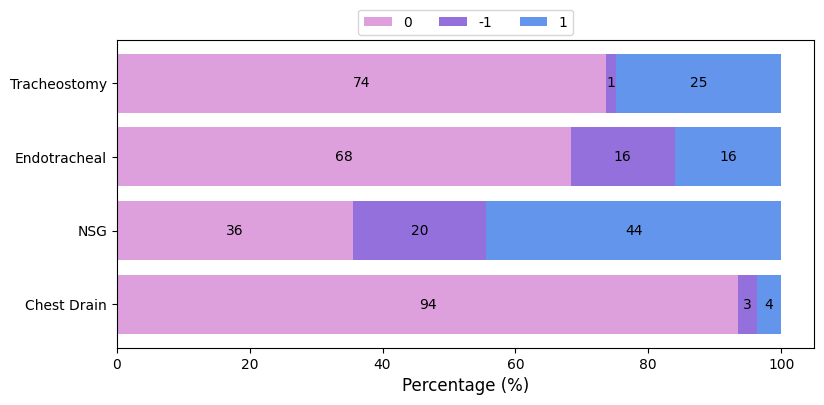

In [67]:
chest = {k:v/sum(Counter(aggre["Chest_drain"]).values())*100 for (k,v) in Counter(aggre["Chest_drain"]).items()}
nsg = {k:v/sum(Counter(aggre["NSG_tube"]).values())*100 for (k,v) in Counter(aggre["NSG_tube"]).items()}
endo = {k:v/sum(Counter(aggre["Endotracheal_tube"]).values())*100 for (k,v) in Counter(aggre["Endotracheal_tube"]).items()}
tra = {k:v/sum(Counter(aggre["Tracheostomy_tube"]).values())*100 for (k,v) in Counter(aggre["Tracheostomy_tube"]).items()}


g1 = np.array([chest[0.0], nsg[0.0], endo[0.0], tra[0.0]])
g2 = np.array([chest[-1], nsg[-1], endo[-1], tra[-1]])
g3 = np.array([chest[1.0], nsg[1.0], endo[1.0], tra[1.0]])

x = ["Chest Drain", "NSG", "Endotracheal", "Tracheostomy"]

fig, ax = plt.subplots(figsize=(9,4))
p1 = ax.barh(x, g1, color='plum', label="0")
p2 = ax.barh(x, g2, left=(g1), color='mediumpurple', label="-1")
p3 = ax.barh(x, g3, left=(g1+g2), color='cornflowerblue', label="1")


ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.12),
          ncol=7, fancybox=True)#, shadow=True)

ax.set_xlabel("Percentage (%)", fontsize=12)

ax.bar_label(p1, label_type='center', fmt='%.0f')
ax.bar_label(p2, label_type='center', fmt='%.0f')
ax.bar_label(p3, label_type='center', fmt='%.0f')


# plt.savefig("Distribution_certain", bbox_inches="tight")
plt.show()

In [68]:
chest

{0: 93.57072205736894, -1: 2.7695351137487636, 1: 3.6597428288822944}

In [69]:
nsg

{-1: 19.980217606330367, 0: 35.60830860534125, 1: 44.41147378832839}

In [70]:
endo

{0: 68.34817012858556, -1: 15.62809099901088, 1: 16.023738872403563}

In [71]:
tra

{1: 24.92581602373887, 0: 73.59050445103857, -1: 1.483679525222552}

In [72]:
sum(chest.values())

100.0

# Exploring images with annotation notes 

In [73]:
annotations = pd.read_csv("../Data/Annotations/Annotations_all_raw.csv", index_col=0)
annotations

,ImageDir,ImageID,Chest_drain_tube_a1,NSG_tube_a1,Endotracheal_tube_a1,Tracheostomy_tube_a1,Notes_a1,Chest_drain_tube_a2,NSG_tube_a2,Endotracheal_tube_a2,Tracheostomy_tube_a2,Notes_a2
0,47,216840111366964012339356563862009041090824095_...,0.00,0.75,0.00,1.0,NaN,0.0,0.25,0.0,1.0,NaN
1,13,216840111366964013686042548532013298085500915_...,0.00,0.00,0.75,0.0,NaN,0.0,0.25,0.0,0.0,NaN
2,39,216840111366964013076187734852011188142138830_...,0.00,1.00,0.25,0.0,NaN,0.0,1.00,0.0,0.0,NaN
3,30,216840111366964013451228379692012296085047250_...,0.00,0.75,0.00,1.0,NaN,0.0,0.25,0.0,0.0,NaN
4,46,216840111366964012339356563862009054142757213_...,0.00,0.25,0.75,0.0,upside down,0.0,0.00,0.0,0.0,upside down
...,...,...,...,...,...,...,...,...,...,...,...,...
1006,2,315655320523004974932472015347869355953_9b6g4k...,0.75,0.00,0.00,0.0,NaN,1.0,0.00,0.0,0.0,NaN
1007,49,216840111366964012819207061112010321132450050_...,0.75,0.00,0.00,0.0,NaN,1.0,0.00,0.0,0.0,NaN
1008,31,216840111366964014008416513202014198084124175_...,0.00,0.00,0.00,0.0,NaN,0.0,0.75,0.0,0.0,NaN
1009,38,216840111366964012989926673512011145120443288_...,1.00,0.00,0.00,0.0,NaN,1.0,0.00,0.0,0.0,NaN


In [74]:
Counter(annotations["Notes_a1"])

Counter({nan: 997,
         'upside down': 7,
         'too unclear': 1,
         'projection?': 1,
         'rotated': 1,
         'below chest': 1,
         'only partial chest': 1,
         'rotated.. And weird': 2})

In [75]:
Counter(annotations["Notes_a2"])

Counter({nan: 991,
         'upside down ': 3,
         'slightly rotated ': 3,
         'Lots of white ': 1,
         'Invalid?': 1,
         'Rotated 90 degrees clockwise ': 1,
         'No lungs?': 1,
         'Too much included?': 1,
         'Upside down ': 4,
         '90 degrees counter clockwise and with white padding ': 1,
         'Entire body of a baby ': 1,
         '90 degrees clockwise and with white padding ': 1,
         'Slightly rotated ': 2})

In [76]:
notes_df = annotations[~(annotations["Notes_a1"].isnull()) | ~(annotations["Notes_a2"].isnull())].reset_index()

In [78]:
notes_df[:3]

,index,ImageDir,ImageID,Chest_drain_tube_a1,NSG_tube_a1,Endotracheal_tube_a1,Tracheostomy_tube_a1,Notes_a1,Chest_drain_tube_a2,NSG_tube_a2,Endotracheal_tube_a2,Tracheostomy_tube_a2,Notes_a2
0,4,46,216840111366964012339356563862009054142757213_...,0.0,0.25,0.75,0.0,upside down,0.0,0.00,0.00,0.0,upside down
1,5,38,216840111366964012283393834152009008124641780_...,0.0,0.75,0.75,0.0,NaN,0.0,0.75,0.00,0.0,slightly rotated
2,6,39,216840111366964012487858717522009250082803954_...,0.0,0.75,0.00,1.0,NaN,0.0,0.00,0.75,0.0,slightly rotated


In [79]:
paths = ['../../../purrlab_students/padchest-preprocessed/' + str(notes_df['ImageDir'][i]) + '/' + str(notes_df['ImageID'][i]) for i in range(len(notes_df))]
notes_df["Paths"] = paths

In [80]:
def display_image(img_path, figsize=(3,3)):
    img = imread(img_path)
#     print(img.shape)
    plt.figure(figsize = figsize)
    plt.imshow(img, cmap='gray')
    plt.show()
    return img

Notes_a1 upside down
Notes_a2 upside down 
../../../purrlab_students/padchest-preprocessed/46/216840111366964012339356563862009054142757213_00-060-080.png
100879    NaN
Name: ViewPosition_DICOM, dtype: object


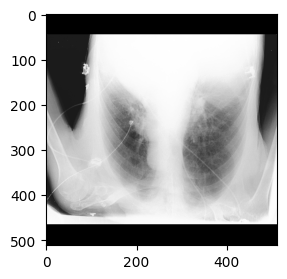


Notes_a1 nan
Notes_a2 slightly rotated 
../../../purrlab_students/padchest-preprocessed/38/216840111366964012283393834152009008124641780_00-008-001.png
84583    NaN
Name: ViewPosition_DICOM, dtype: object


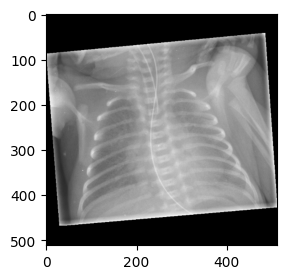


Notes_a1 nan
Notes_a2 slightly rotated 
../../../purrlab_students/padchest-preprocessed/39/216840111366964012487858717522009250082803954_00-020-033.png
86066    NaN
Name: ViewPosition_DICOM, dtype: object


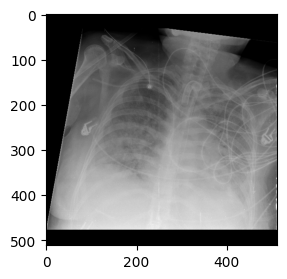


Notes_a1 nan
Notes_a2 slightly rotated 
../../../purrlab_students/padchest-preprocessed/0/141402930860355362066024496090716499628_twvvzo.png
928    NaN
Name: ViewPosition_DICOM, dtype: object


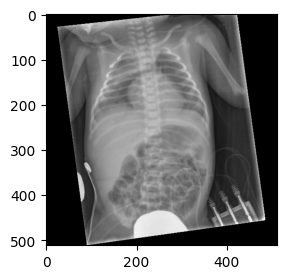


Notes_a1 nan
Notes_a2 Lots of white 
../../../purrlab_students/padchest-preprocessed/31/216840111366964012558082906712010068085839295_03-155-036.png
69062    NaN
Name: ViewPosition_DICOM, dtype: object


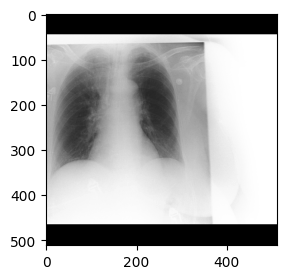


Notes_a1 upside down
Notes_a2 upside down 
../../../purrlab_students/padchest-preprocessed/25/216840111366964013439197051132012219084214768_01-038-020.png
55004    NaN
Name: ViewPosition_DICOM, dtype: object


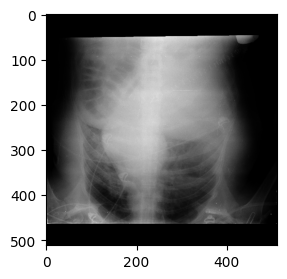


Notes_a1 too unclear
Notes_a2 Invalid?
../../../purrlab_students/padchest-preprocessed/42/216840111366964013076187734852011292090029167_00-196-172.png
92489    NaN
Name: ViewPosition_DICOM, dtype: object


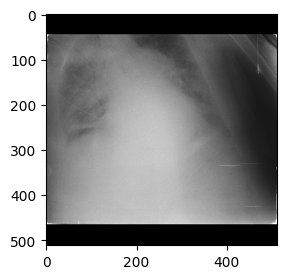


Notes_a1 projection?
Notes_a2 nan
../../../purrlab_students/padchest-preprocessed/27/216840111366964013200840352202011315091845124_01-032-098.png
60363    NaN
Name: ViewPosition_DICOM, dtype: object


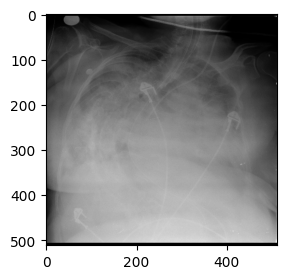


Notes_a1 rotated
Notes_a2 Rotated 90 degrees clockwise 
../../../purrlab_students/padchest-preprocessed/39/216840111366964013076187734852011196135047350_00-141-144.png
85150    NaN
Name: ViewPosition_DICOM, dtype: object


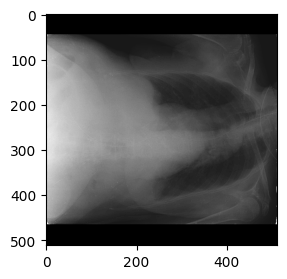


Notes_a1 below chest
Notes_a2 No lungs?
../../../purrlab_students/padchest-preprocessed/21/216840111366964014008416513202014177103307411_01-197-078.png
45927    NaN
Name: ViewPosition_DICOM, dtype: object


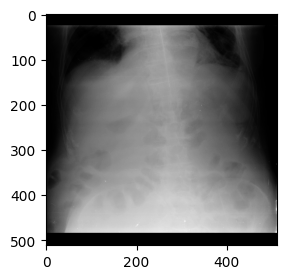


Notes_a1 only partial chest
Notes_a2 nan
../../../purrlab_students/padchest-preprocessed/47/216840111366964012558082906712009300090626285_00-073-162.png
103370    NaN
Name: ViewPosition_DICOM, dtype: object


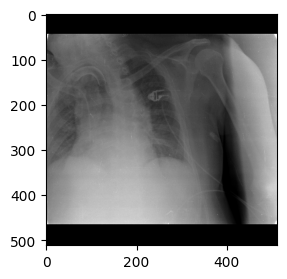


Notes_a1 upside down
Notes_a2 upside down 
../../../purrlab_students/padchest-preprocessed/18/12752243479320241232628_02-122-132.png
39423    NaN
Name: ViewPosition_DICOM, dtype: object


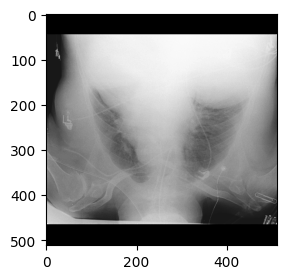


Notes_a1 nan
Notes_a2 Too much included?
../../../purrlab_students/padchest-preprocessed/20/216840111366964013217898866992011355103513534_01-012-048.png
45055    NaN
Name: ViewPosition_DICOM, dtype: object


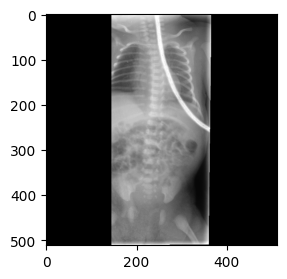


Notes_a1 upside down
Notes_a2 Upside down 
../../../purrlab_students/padchest-preprocessed/44/216840111366964012487858717522009223090401336_00-005-153.png
98053    NaN
Name: ViewPosition_DICOM, dtype: object


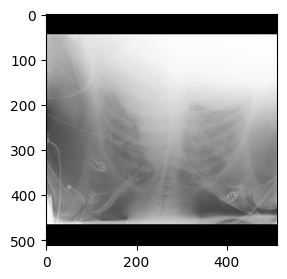


Notes_a1 upside down
Notes_a2 Upside down 
../../../purrlab_students/padchest-preprocessed/35/216840111366964012819207061112010251085534470_03-126-063.png
77388    NaN
Name: ViewPosition_DICOM, dtype: object


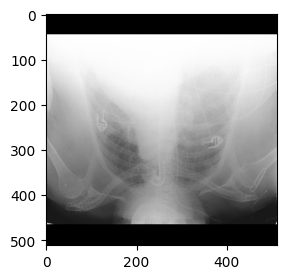


Notes_a1 rotated.. And weird
Notes_a2 90 degrees counter clockwise and with white padding 
../../../purrlab_students/padchest-preprocessed/43/216840111366964012558082906712009317134005935_00-105-197.png
94220    NaN
Name: ViewPosition_DICOM, dtype: object


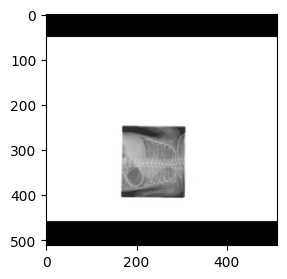


Notes_a1 nan
Notes_a2 Entire body of a baby 
../../../purrlab_students/padchest-preprocessed/47/216840111366964012487858717522009281103421794_00-073-108.png
103372    NaN
Name: ViewPosition_DICOM, dtype: object


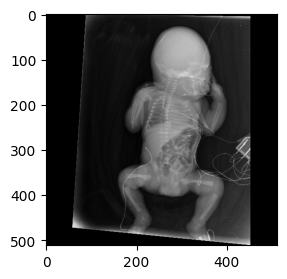


Notes_a1 rotated.. And weird
Notes_a2 90 degrees clockwise and with white padding 
../../../purrlab_students/padchest-preprocessed/46/216840111366964012989926673512011069085152595_00-166-149.png
101275    NaN
Name: ViewPosition_DICOM, dtype: object


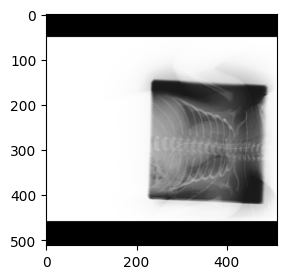


Notes_a1 nan
Notes_a2 Slightly rotated 
../../../purrlab_students/padchest-preprocessed/29/216840111366964014008416513202014211095000632_01-163-066.png
63805    NaN
Name: ViewPosition_DICOM, dtype: object


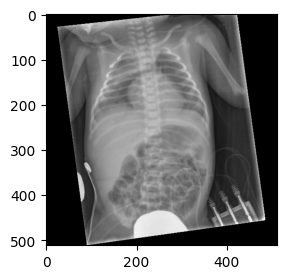


Notes_a1 upside down
Notes_a2 Upside down 
../../../purrlab_students/padchest-preprocessed/35/216840111366964012819207061112010253091817956_03-131-169.png
76886    NaN
Name: ViewPosition_DICOM, dtype: object


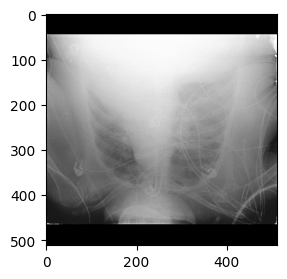


Notes_a1 upside down
Notes_a2 Upside down 
../../../purrlab_students/padchest-preprocessed/41/216840111366964012373310883942009169133600975_00-096-104.png
91424    NaN
Name: ViewPosition_DICOM, dtype: object


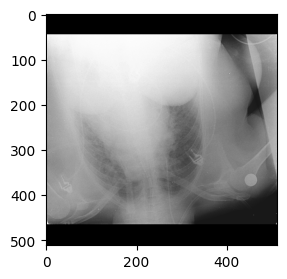


Notes_a1 nan
Notes_a2 Slightly rotated 
../../../purrlab_students/padchest-preprocessed/34/216840111366964012558082906712010033103148280_03-170-103.png
73957    NaN
Name: ViewPosition_DICOM, dtype: object


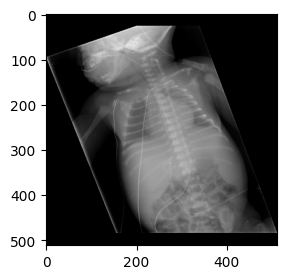

In [81]:
for index, row in notes_df.iterrows():
    print("Notes_a1", row["Notes_a1"])
    print("Notes_a2", row["Notes_a2"])
    print(row["Paths"])
    temp = chest_data[chest_data["ImageID"] == row["ImageID"]]
    
    print(temp["ViewPosition_DICOM"])
    display_image(row["Paths"])
    print()

# Exploring additional preprocessing steps - Removing white padding 

In [ ]:
# img_path = "../../../purrlab_students/padchest-preprocessed/43/216840111366964012558082906712009317134005935_00-105-197.png"
img_path = "../../../purrlab_students/padchest-preprocessed/46/216840111366964012989926673512011069085152595_00-166-149.png"

In [82]:
def remove_pad(image, min_value, max_value):
    dummy = np.argwhere(image >= min_value+10)
    max_y = dummy[:, 0].max()
    min_y = dummy[:, 0].min()
    min_x = dummy[:, 1].min()
    max_x = dummy[:, 1].max()
    crop_image = image[min_y:max_y, min_x:max_x]

    dummy2 = np.argwhere(crop_image <= max_value-10)
    max_y = dummy2[:, 0].max()
    min_y = dummy2[:, 0].min()
    min_x = dummy2[:, 1].min()
    max_x = dummy2[:, 1].max()
    crop_image2 = crop_image[min_y:max_y, min_x:max_x]
    
    return crop_image2

In [83]:
def preprocess_img(img_path, printing=False):
    
    try:
        img = imread(img_path)
    except:
        return "Not an Image"
    
    if printing:
        print("original image, shape:", img.shape)
        plt.imshow(img, cmap='gray')
        plt.show()


    # find max and min values: 
    max_value = img.max()
    min_value = img.min()
    print(max_value)
    print(min_value)
    # Check if the image is just all black
    if max_value == min_value:
        return "Not an Image"

    # removing padding
    img = remove_pad(img, min_value, max_value)
    if printing:
        print("remove extra padding, shape:", img.shape)
        plt.imshow(img, cmap='gray')
        plt.show()

    return img

original image, shape: (512, 512)


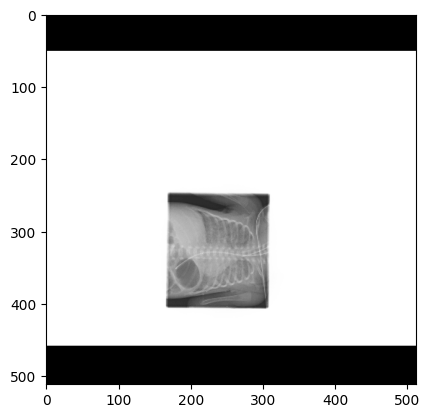

255
0
remove extra padding, shape: (161, 144)


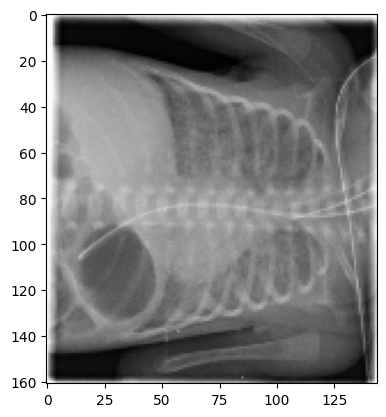

In [84]:
img_path = "../../../purrlab_students/padchest-preprocessed/43/216840111366964012558082906712009317134005935_00-105-197.png"
preproc_img = preprocess_img(img_path, True)

original image, shape: (512, 512)


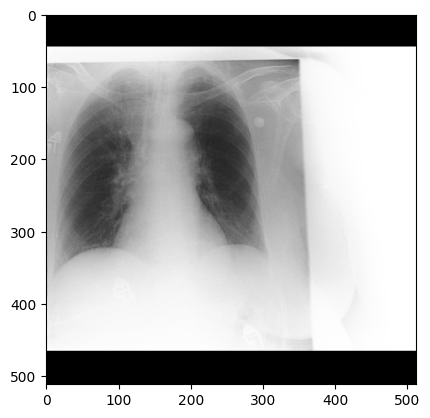

255
0
remove extra padding, shape: (419, 437)


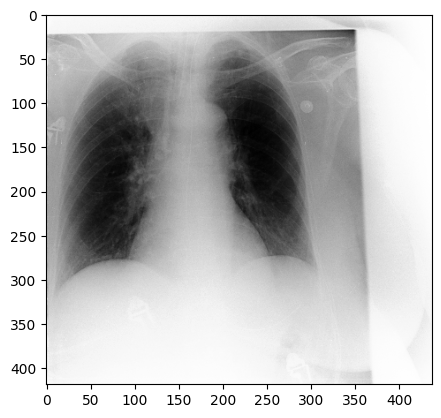

In [85]:
img_path = "../../../purrlab_students/padchest-preprocessed/31/216840111366964012558082906712010068085839295_03-155-036.png"
preproc_img = preprocess_img(img_path, True)

original image, shape: (512, 512)


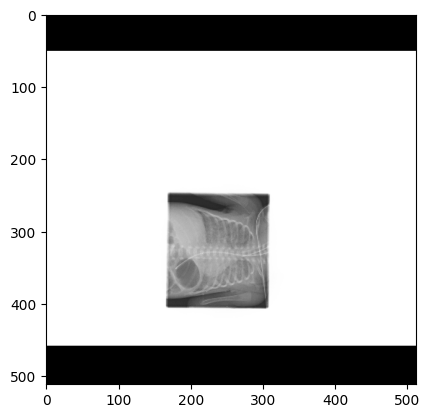

255
0
remove extra padding, shape: (161, 144)


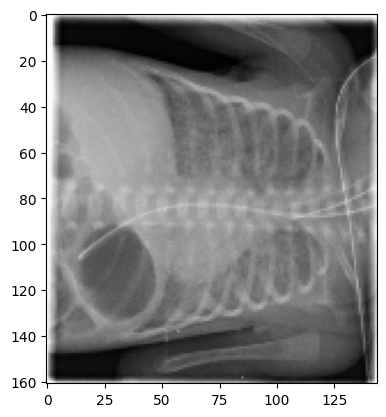

In [86]:
img_path = "../../../purrlab_students/padchest-preprocessed/43/216840111366964012558082906712009317134005935_00-105-197.png"
preproc_img = preprocess_img(img_path, True)

original image, shape: (512, 512)


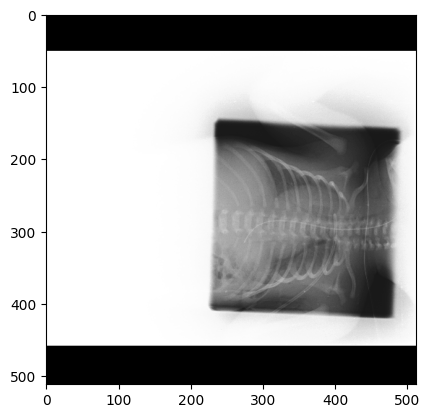

255
0
remove extra padding, shape: (360, 312)


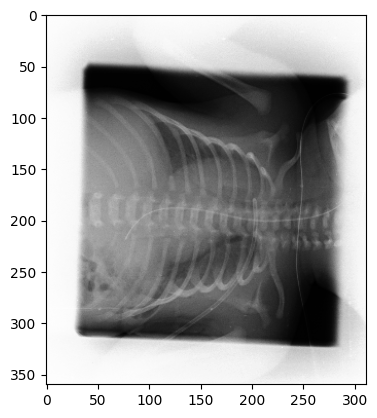

In [87]:
img_path = "../../../purrlab_students/padchest-preprocessed/46/216840111366964012989926673512011069085152595_00-166-149.png"
preproc_img = preprocess_img(img_path, True)

In [20]:
data[(data["ImageID"] == "216840111366964012558082906712009317134005935_00-105-197.png")].T

,139117
ImageID,216840111366964012558082906712009317134005935_...
ImageDir,43
StudyDate_DICOM,20091113
StudyID,216840111366964012558082906712009317134005935
PatientID,93219599527436689746370980612213632512
PatientBirth,2009.0
PatientSex_DICOM,F
ViewPosition_DICOM,NaN
Projection,AP
MethodProjection,Manual review of DICOM fields


# Save image for paper

In [32]:
def save_img(path, name):
    img = imread(path)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
#     plt.title("No finding")
    plt.savefig(name, bbox_inches="tight")
    plt.show()

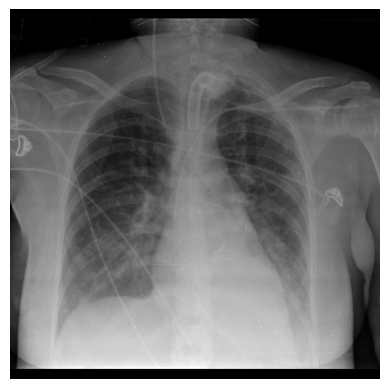

In [20]:
p = "../../../purrlab_students/padchest-preprocessed/"
img_path = "24/216840111366964013451228379692012250132537075_01-058-188.png"
save_img(p + img_path, "trach_img")

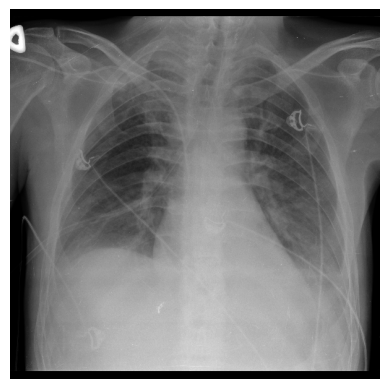

In [22]:
p = "../../../purrlab_students/padchest-preprocessed/"
img_path = "2/315655320523004974932472015347869355953_9b6g4k.png"
save_img(p + img_path, "chest_drain_img")


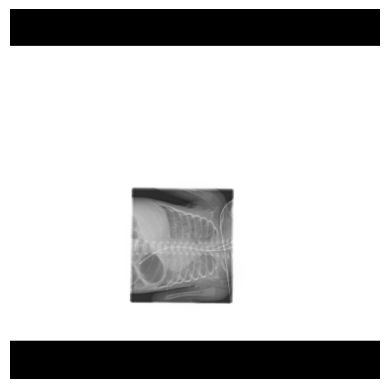

In [33]:
img_path = "../../../purrlab_students/padchest-preprocessed/43/216840111366964012558082906712009317134005935_00-105-197.png"
save_img(img_path, "white_padded_img")


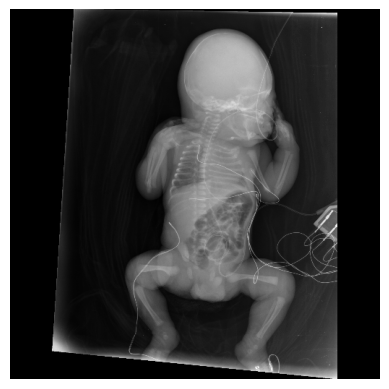

In [46]:
img_path = "../../../purrlab_students/padchest-preprocessed/47/216840111366964012487858717522009281103421794_00-073-108.png"
save_img(img_path, "baby_img")


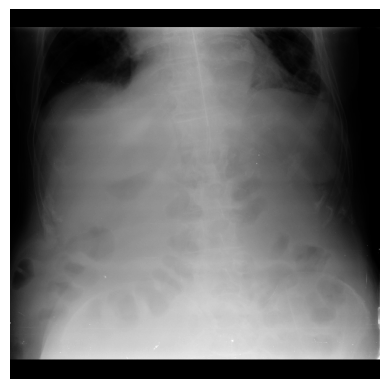

In [47]:
img_path = "../../../purrlab_students/padchest-preprocessed/21/216840111366964014008416513202014177103307411_01-197-078.png"
save_img(img_path, "below_chest_img")


## keep axis 

In [29]:
def save_img(path, name):
    img = imread(path)
    plt.imshow(img, cmap='gray')
#     plt.axis('off')
#     plt.title("No finding")
    plt.savefig(name, bbox_inches="tight")
    plt.show()

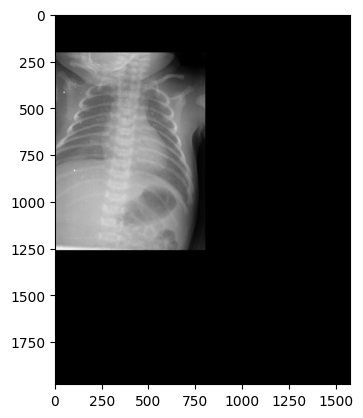

In [30]:
img_path = "../../../purrlab/padchest/12/216840111366964013534861372972013002124933529_02-011-018.png"
save_img(img_path, "orig_img")


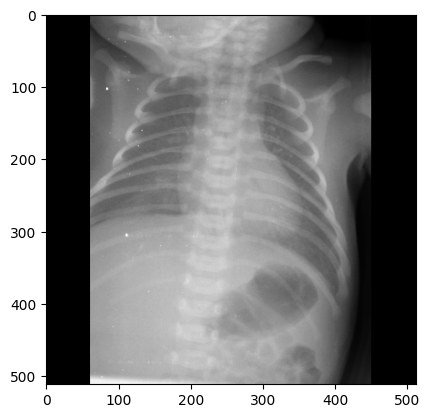

In [31]:
img_path = "../../../purrlab_students/padchest-preprocessed/12/216840111366964013534861372972013002124933529_02-011-018.png"
save_img(img_path, "preproc_img")
